# Template for Binary Classification
The purpose of this Jupyter Notebook is to serve as a template for a typical problem that can be solved using binary classification algorithms.

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(context='talk')

import numpy as np
import pandas as pd

from sklearn import datasets

import urllib

## Import Data
The Pima Indians Diabetes data from UCI's data repository is used here.

In [2]:
"""import data from a weblink"""
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
raw_data = urllib.request.urlopen(url)
data = pd.read_csv(raw_data, header=None)
data.columns = ['num_pregnant', 'glucose', 'blood_pressure', 'tricep_skin_fold_thickness', 'insulin', 'bmi', 'pedigree', 'age', 'class']

In [3]:
"""optional: save data to disk"""
# import os
# if not os.path.isdir('data'):
#     os.mkdir('data')
# data.to_csv(os.path.join('data', 'diabetes.csv'), index=False)

'optional: save data to disk'

In [4]:
"""optional: import data from disk"""
# import os
# data = pd.read_csv(os.path.join('data', 'diabetes.csv'))

'optional: import data from disk'

In [5]:
class_column = 'class'

In [6]:
x = data.drop(class_column, axis=1)
y = data[class_column]

## Data Stats and Visualization

In [7]:
data.head()

,num_pregnant,glucose,blood_pressure,tricep_skin_fold_thickness,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.describe()

,num_pregnant,glucose,blood_pressure,tricep_skin_fold_thickness,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


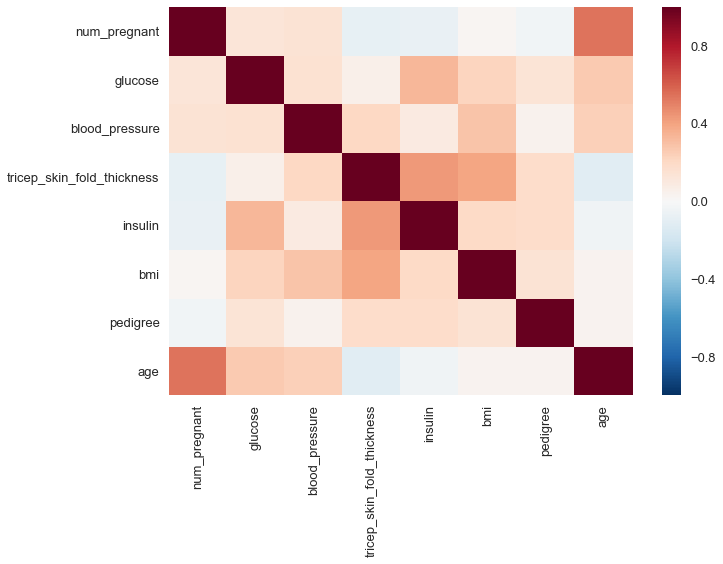

In [9]:
""" Correlation Heatmap """
sns.heatmap(x.corr());

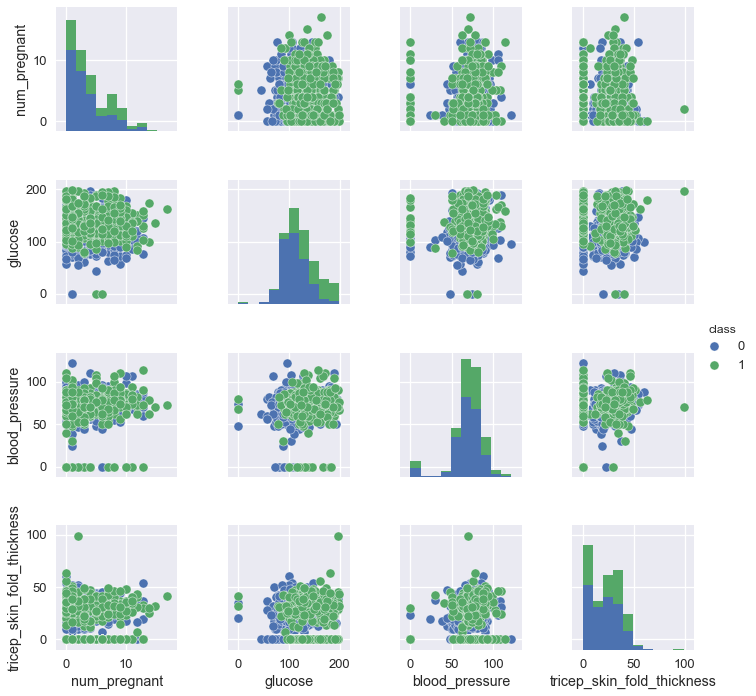

In [10]:
""" Pairplot of first 4 features """
sns.pairplot(data, vars=data.columns[:4], hue=class_column);

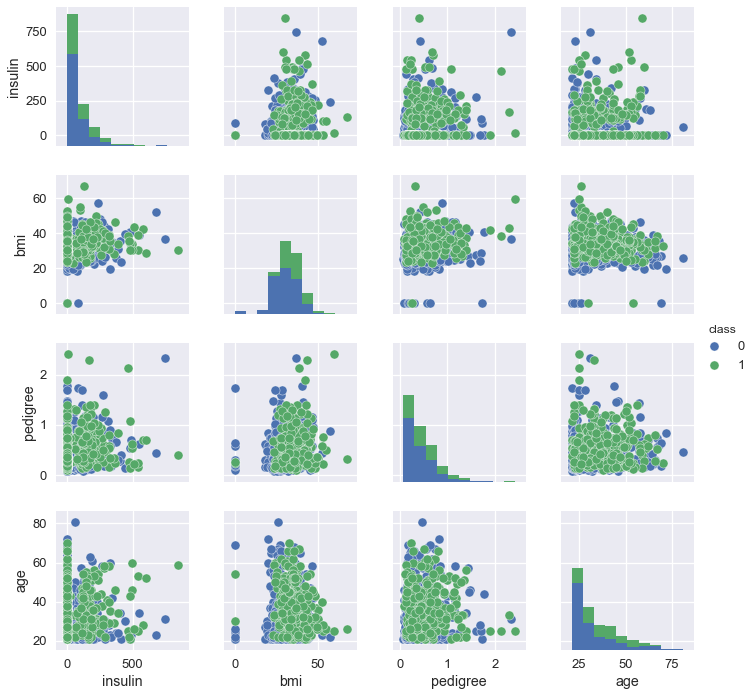

In [11]:
""" Pairplot of next 4 features """
sns.pairplot(data, vars=data.columns[4:8], hue=class_column);

## Data Cleanup

## Split Data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
print('Train set has {} samples'.format(x_train.shape[0]))
print('Test set has {} samples'.format(x_test.shape[0]))

Train set has 614 samples
Test set has 154 samples


## Feature Selection

In [15]:
from sklearn.feature_selection import f_classif

In [16]:
p_value_thres = 0.05
num_top_features_to_select = 10

In [17]:
""" ANOVA F-Test to select best features """
f_value, p_value = f_classif(x_train, y_train)
anova = pd.DataFrame()
anova['feature'] = x_train.columns
anova['f_value'] = f_value
anova['p_value'] = p_value
anova = anova[anova.p_value <= p_value_thres]
anova = anova.sort_values('f_value', ascending=False)
anova

,feature,f_value,p_value
1,glucose,165.129588,1.250487e-33
5,bmi,57.227944,1.430143e-13
7,age,32.437088,1.912930e-08
0,num_pregnant,27.306744,2.384414e-07
6,pedigree,22.872884,2.170897e-06
4,insulin,14.993232,1.195071e-04
3,tricep_skin_fold_thickness,5.524484,1.906863e-02
2,blood_pressure,4.944781,2.653380e-02


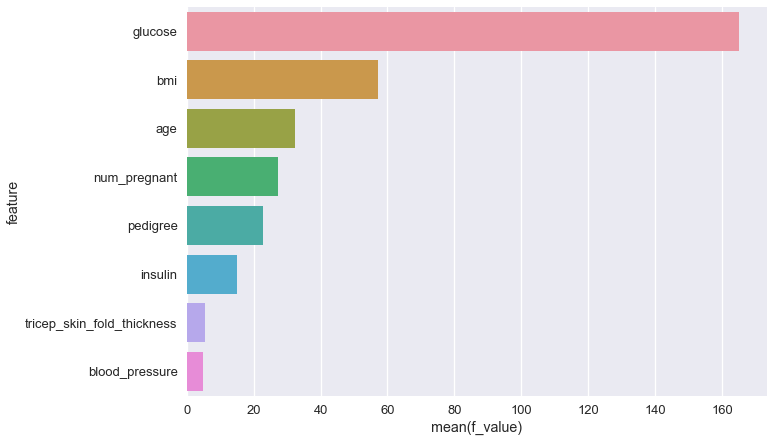

In [18]:
sns.barplot(data=anova, x='f_value', y='feature');

In [19]:
features = anova.feature[:num_top_features_to_select].tolist()

## Model Training

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [21]:
models = [('Logistic Regression', LogisticRegression()),
          ('SVM', SVC(probability=True)), 
          ('Gradient Boosting', GradientBoostingClassifier()), 
          ('Random Forest', RandomForestClassifier())]

In [22]:
for label, model in models:
    model.fit(x_train, y_train)
    print('{} score: {:.3f}'.format(label, model.score(x_test, y_test)))

Logistic Regression score: 0.766
SVM score: 0.610
Gradient Boosting score: 0.727
Random Forest score: 0.799


## Model Evaluation

In [23]:
from sklearn import metrics
import dsflow

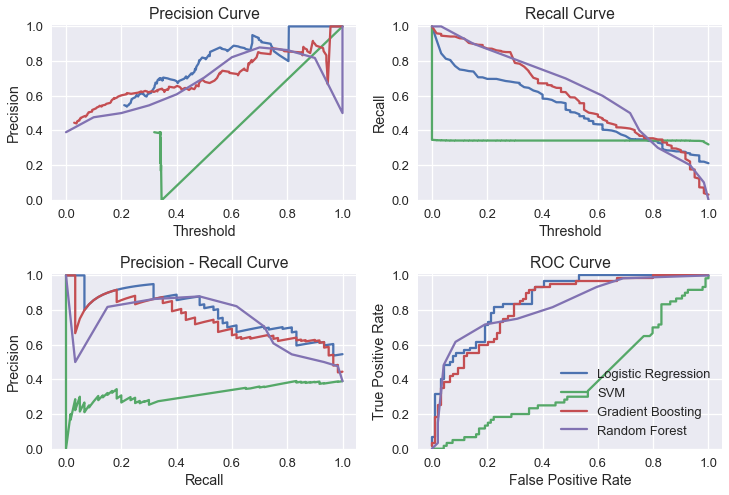

In [24]:
for label, model in models:
    y_pred_proba = model.predict_proba(x_test)[:,1]
    dsflow.plot_performance_curves(y_pred_proba, y_test, label=label)

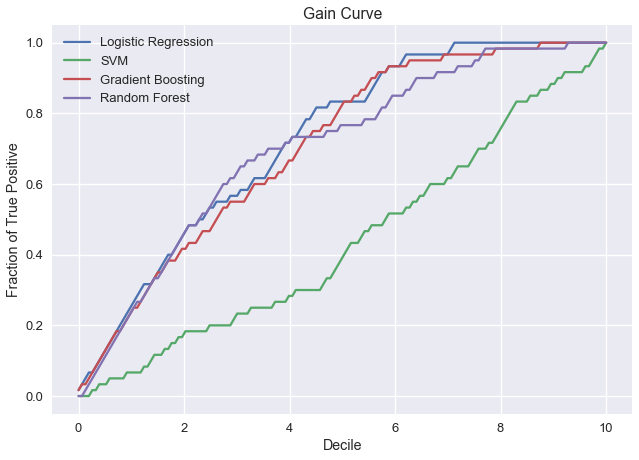

In [25]:
for label, model in models:
    y_pred_proba = model.predict_proba(x_test)[:,1]
    dsflow.plot_gain_curve(y_pred_proba, y_test, label=label)

In [26]:
for label, model in models:
    y_pred_proba = model.predict_proba(x_test)[:,1]
    print('{}, Gain AUC: {:.3f}'.format(label, dsflow.gain_auc(y_pred_proba, y_test)))

Logistic Regression, Gain AUC: 0.726
SVM, Gain AUC: 0.439
Gradient Boosting, Gain AUC: 0.706
Random Forest, Gain AUC: 0.702
